In [1]:
import trading_strategy
import torch
import utils
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme()

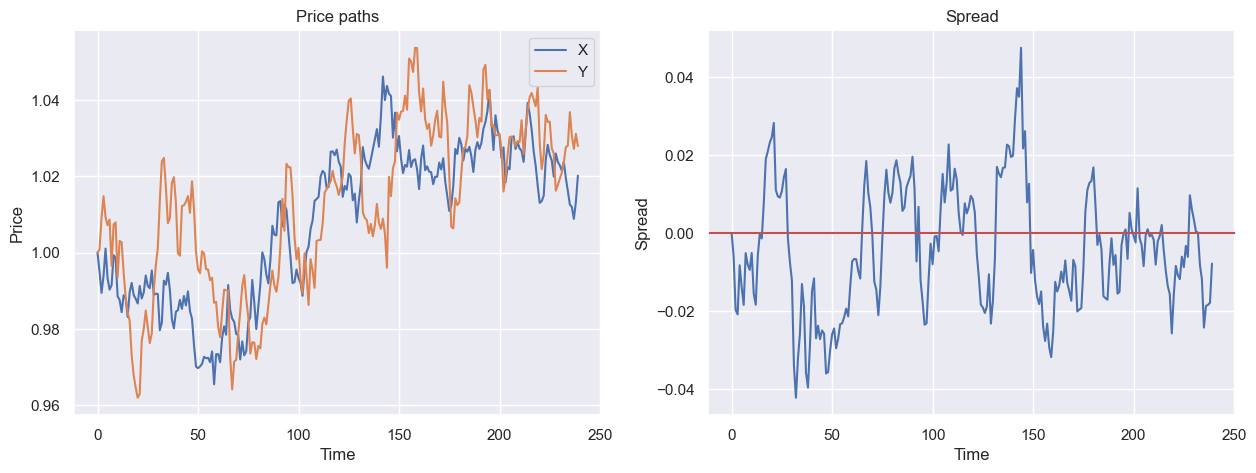

In [2]:
# Define parameters
sigma_x = 0.2
sigma_y = 0.3
kappa = 50
T = 30 * (1/252) # 1 month
n = 30*8 # hourly
X_0 = 1
Y_0 = 1

def synthetic_pairs(batch_size: int, T: int, n: int, X_0: float, Y_0: float, sigma_x: float, sigma_y: float, kappa: float):
    n_assets = 2
    price_paths = torch.zeros(batch_size, n, n_assets)
    price_paths[:,:,0] = X_0
    price_paths[:,:,1] = Y_0
    delta_t = T/n

    for i in range(1,n):
        # price_paths[:,i,0] = price_paths[:,i-1,0] + sigma_x*torch.randn(batch_size)*np.sqrt(delta_t)*price_paths[:,i-1,0]
        # price_paths[:,i,1] = price_paths[:,i-1,1] + sigma_y*torch.randn(batch_size)*np.sqrt(delta_t)*price_paths[:,i-1,1] + kappa*(price_paths[:,i-1,0] - price_paths[:,i-1,1])*delta_t
        
        # we use the additive model instead of the multiplicative model (as proposed in the paper)
        price_paths[:,i,0] = price_paths[:,i-1,0] + sigma_x*torch.randn(batch_size)*np.sqrt(delta_t)
        price_paths[:,i,1] = price_paths[:,i-1,1] + sigma_y*torch.randn(batch_size)*np.sqrt(delta_t) + kappa*(price_paths[:,i-1,0] - price_paths[:,i-1,1])*delta_t

    return price_paths

batch_size = 30000
synthetic_batch_stock_data = synthetic_pairs(batch_size, T, n, X_0, Y_0, sigma_x, sigma_y, kappa)
info_data = torch.zeros(batch_size, n, 0) # no info

# let's look at our synthetic data
fig, ax = plt.subplots(1,2, figsize=(15,5))
example_index = 0
example_pair_path = synthetic_batch_stock_data[example_index,:,:]
ax[0].plot(example_pair_path[:,0])
ax[0].plot(example_pair_path[:,1])
ax[0].set_title("Price paths")
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Price")
ax[0].legend(["X", "Y"])
ax[1].plot(example_pair_path[:,0] - example_pair_path[:,1])
ax[1].axhline(y=0, color='r', linestyle='-')
ax[1].set_title("Spread")
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Spread")
plt.show()

In [3]:
depth = 1
delta = 1

In [4]:
# fit with only 100 samples
n_samples = 100
ts = trading_strategy.TradingStrategy(depth, delta)
ts.fit(synthetic_batch_stock_data[:n_samples,:,:], info_data[:n_samples,:,:])
# func with 
print('l1:')
l1 = ts.functionals[0]
utils.print_signature(l1, ts.Z_dimension, ts.depth)
print('\n')
print('l2:')
l2 = ts.functionals[1]
utils.print_signature(l2, ts.Z_dimension, ts.depth)

mu_sig successfully computed
sigma_sig successfully computed
lambda successfully computed
Fitting successful.

l1:
Level 0:
tensor([-7.1107])
Level 1:
tensor([   8.7139,  869.2175, -853.5403])


l2:
Level 0:
tensor([1.7691])
Level 1:
tensor([   3.2710, -889.8464,  976.3527])


In [5]:
# fit with only 1000 samples
n_samples = 1000
ts = trading_strategy.TradingStrategy(depth, delta)
ts.fit(synthetic_batch_stock_data[:n_samples,:,:], info_data[:n_samples,:,:])
# func with 
print('l1:')
l1 = ts.functionals[0]
utils.print_signature(l1, ts.Z_dimension, ts.depth)
print('\n')
print('l2:')
l2 = ts.functionals[1]
utils.print_signature(l2, ts.Z_dimension, ts.depth)

mu_sig successfully computed
sigma_sig successfully computed
lambda successfully computed
Fitting successful.

l1:
Level 0:
tensor([-3.7465])
Level 1:
tensor([   2.8854,  762.7449, -795.1161])


l2:
Level 0:
tensor([2.7562])
Level 1:
tensor([-8.6621e-01, -8.2789e+02,  9.1753e+02])


In [6]:
# fit with only 1000 samples
n_samples = 10000
print('first 1/3 of the data')
ts = trading_strategy.TradingStrategy(depth, delta)
ts.fit(synthetic_batch_stock_data[:n_samples,:,:], info_data[:n_samples,:,:])
# func with 
print('l1:')
l1 = ts.functionals[0]
utils.print_signature(l1, ts.Z_dimension, ts.depth)
print('\n')
print('l2:')
l2 = ts.functionals[1]
utils.print_signature(l2, ts.Z_dimension, ts.depth)

print('second 1/3 of the data')
shift = 10000
ts = trading_strategy.TradingStrategy(depth, delta)
ts.fit(synthetic_batch_stock_data[shift:shift+n_samples,:,:], info_data[shift:shift+n_samples,:,:])
# func with
print('l1:')
l1 = ts.functionals[0]
utils.print_signature(l1, ts.Z_dimension, ts.depth)
print('\n')
print('l2:')
l2 = ts.functionals[1]
utils.print_signature(l2, ts.Z_dimension, ts.depth)

print('last 1/3 of the data')
ts = trading_strategy.TradingStrategy(depth, delta)
ts.fit(synthetic_batch_stock_data[2*shift:2*shift+n_samples,:,:], info_data[2*shift:2*shift+n_samples,:,:])
# func with
print('l1:')
l1 = ts.functionals[0]
utils.print_signature(l1, ts.Z_dimension, ts.depth)
print('\n')
print('l2:')
l2 = ts.functionals[1]
utils.print_signature(l2, ts.Z_dimension, ts.depth)

first 1/3 of the data
function compute_signature took 8.58s
mu_sig successfully computed
sigma_sig successfully computed
lambda successfully computed
Fitting successful.

l1:
Level 0:
tensor([-0.5896])
Level 1:
tensor([ 5.6839e-01,  7.5870e+02, -7.9491e+02])


l2:
Level 0:
tensor([0.3117])
Level 1:
tensor([-1.2642e-01, -8.1096e+02,  9.1136e+02])
second 1/3 of the data


KeyboardInterrupt: 

In [ ]:
# train on all data
print('all data')
ts = trading_strategy.TradingStrategy(depth, delta)
ts.fit(synthetic_batch_stock_data, info_data)
# func with
print('l1:')
l1 = ts.functionals[0]
utils.print_signature(l1, ts.Z_dimension, ts.depth)
print('\n')
print('l2:')
l2 = ts.functionals[1]
utils.print_signature(l2, ts.Z_dimension, ts.depth)

all data
function compute_signature took 22.39s
mu_sig successfully computed
sigma_sig successfully computed
lambda successfully computed
Fitting successful.

l1:
Level 0:
tensor([-0.4994])
Level 1:
tensor([ 5.7868e-01,  7.5196e+02, -7.8562e+02])


l2:
Level 0:
tensor([0.0823])
Level 1:
tensor([ 1.7172e-01, -7.9866e+02,  8.9868e+02])


In [ ]:
# FLIP THEM!
ts.functionals[0] = -ts.functionals[0]
ts.functionals[1] = -ts.functionals[1]

In [ ]:
n_traded_processes = 100
all_daily_pnl = torch.zeros(n_traded_processes, n-1)
all_cum_pnl = torch.zeros(n_traded_processes, n-1)
for i in range(n_traded_processes):
    X = synthetic_batch_stock_data[i,:,:]
    f = info_data[i,:,:]
    xi = ts.trade(X, f)
    daily_pnl = ts.compute_pnl(X, xi) # daily pnl on each asset
    daily_global_pnl = torch.sum(daily_pnl, dim=1) # daily pnl on the portfolio
    cum_global_pnl = torch.cumsum(daily_global_pnl, dim=0)
    all_daily_pnl[i,:] = daily_global_pnl
    all_cum_pnl[i,:] = cum_global_pnl

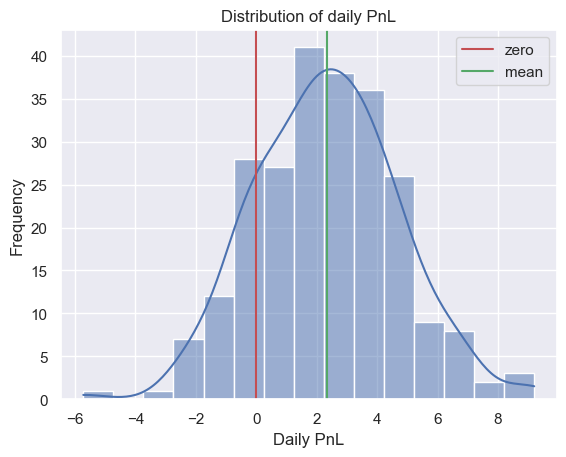

In [ ]:
# dist of all daily pnl
daily_portfolio_pnl = torch.sum(all_daily_pnl, dim=0)
sns.histplot(daily_portfolio_pnl, kde=True)
plt.title("Distribution of daily PnL")
plt.xlabel("Daily PnL")
plt.ylabel("Frequency")
plt.axvline(x=0, color='r', linestyle='-', label='zero')
mean_daily_pnl = torch.mean(daily_portfolio_pnl)
plt.axvline(x=mean_daily_pnl, color='g', linestyle='-', label='mean')
plt.legend()
plt.show()

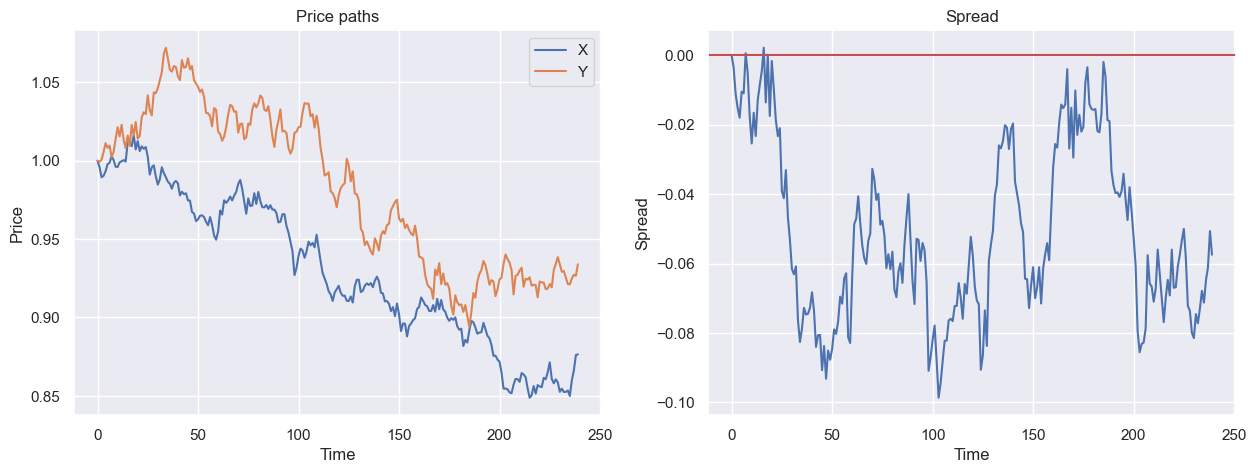

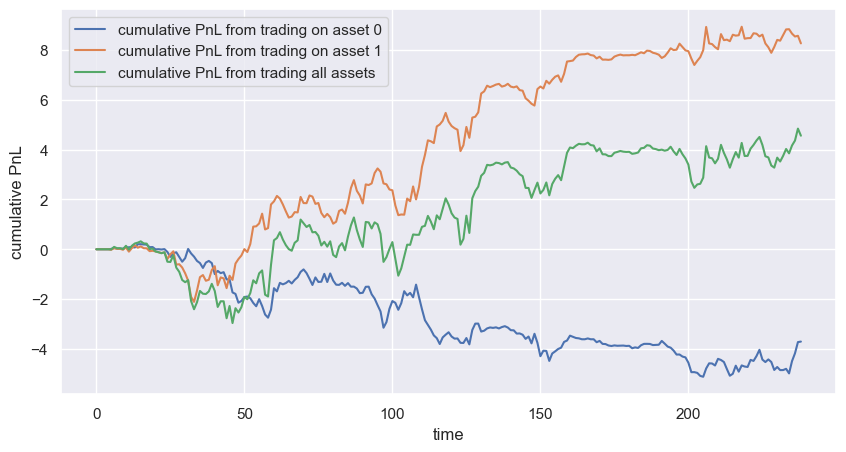

In [ ]:
# OUT OF SAMPLE

# let's generate some out of sample data

oos_batch_size = 10
oos_data = synthetic_pairs(oos_batch_size, T, n, X_0, Y_0, sigma_x, sigma_y, kappa)

# let's look at our synthetic data
fig, ax = plt.subplots(1,2, figsize=(15,5))
example_index = 1
example_pair_path = oos_data[example_index,:,:]
ax[0].plot(example_pair_path[:,0])
ax[0].plot(example_pair_path[:,1])
ax[0].set_title("Price paths")
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Price")
ax[0].legend(["X", "Y"])
ax[1].plot(example_pair_path[:,0] - example_pair_path[:,1])
ax[1].axhline(y=0, color='r', linestyle='-')
ax[1].set_title("Spread")
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Spread")
plt.show()


# let's trade on the out of sample data
stock_data = oos_data[example_index,:,:]
# unsqueeze the batch dimension
info_data = torch.zeros(1, n, 0)[0] # no info

# trade
xi = ts.trade(stock_data, info_data)

daily_pnl = ts.compute_pnl(stock_data, xi)
cum_pnl = torch.cumsum(daily_pnl, dim=0)
utils.plot_cum_pnl(cum_pnl)

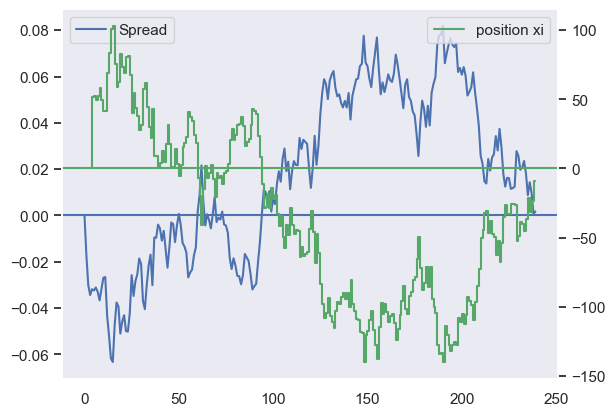

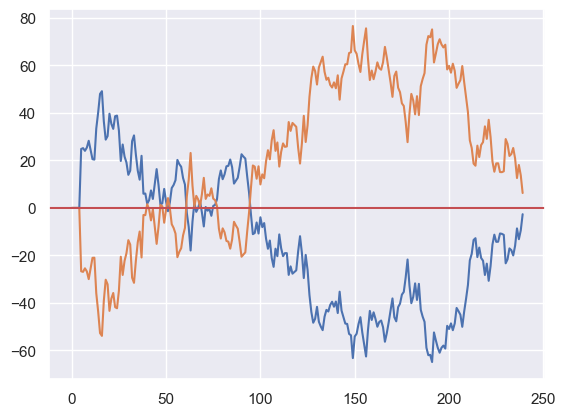

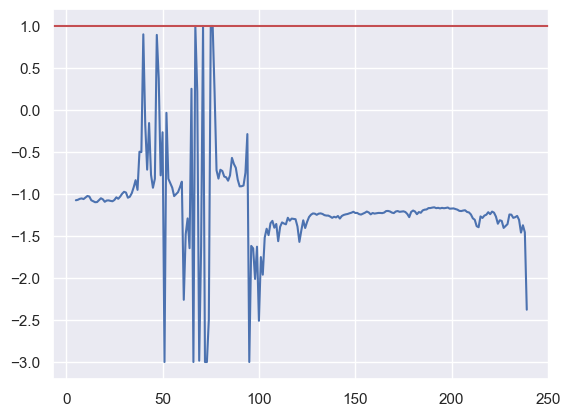

In [ ]:
# compare spread and xi
plt.plot(stock_data[:,0] - stock_data[:,1], label='Spread', color='b')
diff_pos = xi[:,0] - xi[:,1]
plt.grid(False)
plt.legend()
plt.axhline(y=0, color='b', linestyle='-')
plt.twinx()
plt.step(range(len(diff_pos)), diff_pos, color='g', label='position xi')
plt.legend()
# no grid lines
plt.grid(False)
plt.axhline(y=0, color='g', linestyle='-')
plt.show()

# plot xi[0] and xi[1]
plt.figure()
plt.plot(xi[:,0])
plt.plot(xi[:,1])
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# plot xi[1]/xi[0]
plt.figure()
delta = 2
mean = -1
plt.plot(np.clip(xi[:,1]/xi[:,0], mean-delta, mean+delta))
plt.axhline(y=1, color='r', linestyle='-')
plt.show()